C:\Users\3253q\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


混淆矩陣：
[[21949  1037]
 [ 2588  2566]]

準確率： 0.8711798152096659

分類報告：
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     22986
           1       0.71      0.50      0.59      5154

    accuracy                           0.87     28140
   macro avg       0.80      0.73      0.75     28140
weighted avg       0.86      0.87      0.86     28140



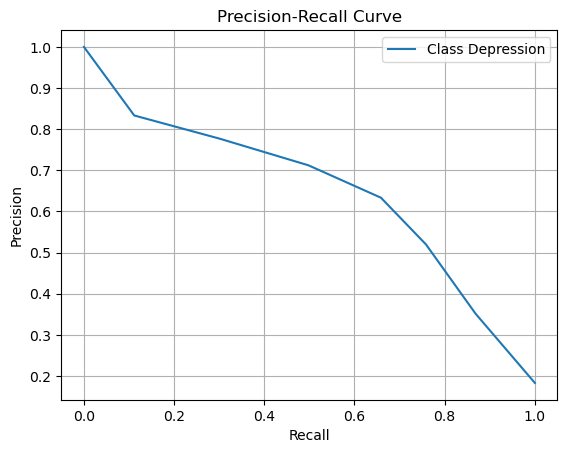

In [2]:
#KNN分類器

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt


train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


# 1. 數據準備

x = train_data.drop(columns=['id', 'Name','Depression'])
y = train_data['Depression']
test = test_data.drop(columns=['id', 'Name'])

# 80% 訓練，20% 測試
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 二元化+標準化（註：KNN對特徵標準化比較敏感）
categorical_columns = x_train.select_dtypes(include=['object', 'category']).columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train[categorical_columns])
x_test_encoded = encoder.transform(x_test[categorical_columns])
test_encoded = encoder.transform(test[categorical_columns])

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_encoded)
x_test_scaled = scaler.transform(x_test_encoded)
test_scaled = scaler.transform(test_encoded)

# 2. 訓練 KNeighborsClassifier 模型
# 設定 6 個鄰居
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train_scaled, y_train)

# 3. 預測
y_pred = knn.predict(x_test_scaled)

# 4. 效能評估
# 計算混淆矩陣
conf_matrix = confusion_matrix(y_test, y_pred)

# 生成分類報告
class_report = classification_report(y_test, y_pred)

# 計算準確率
accuracy = accuracy_score(y_test, y_pred)

# 輸出結果
print("混淆矩陣：")
print(conf_matrix)
print("\n準確率：", accuracy)
print("\n分類報告：")
print(class_report)


classes = y.unique()
y_test_bin = label_binarize(y_test, classes=[0, 1])  
y_score = knn.predict_proba(x_test_scaled) 

# 繪製 Precision-Recall 曲線
precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), y_score[:, 1]) 
plt.plot(recall, precision, label='Class Depression')

# 曲線配置
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# 5. 對 test.csv 預測
test_predictions = knn.predict(test_scaled)

# 6. 保存為 submission.csv
submission = pd.DataFrame({
    'id': test_data['id'],
    'Depression': test_predictions
})

submission.to_csv('submission.csv', index=False)




C:\Users\3253q\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


混淆矩陣：
[[22024   962]
 [ 1917  3237]]

準確率： 0.8976901208244492

分類報告：
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     22986
           1       0.77      0.63      0.69      5154

    accuracy                           0.90     28140
   macro avg       0.85      0.79      0.82     28140
weighted avg       0.89      0.90      0.89     28140



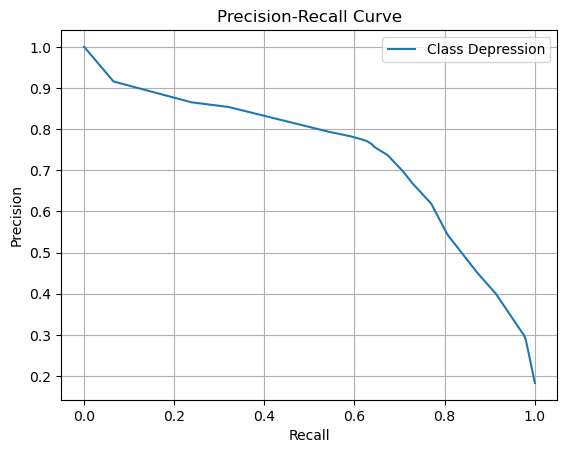

In [15]:
#決策樹分類器

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt



train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


# 1. 數據準備

x = train_data.drop(columns=['id', 'Name','Depression'])
y = train_data['Depression']
test = test_data.drop(columns=['id', 'Name'])

# 80% 訓練，20% 測試
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#二元化
categorical_columns = x_train.select_dtypes(include=['object', 'category']).columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train[categorical_columns])
x_test_encoded = encoder.transform(x_test[categorical_columns])
test_encoded = encoder.transform(test[categorical_columns])


# 2.建立 DecisionTreeClassifier 模型
dtc = DecisionTreeClassifier(criterion='gini', max_depth=5,random_state=42)  
dtc.fit(x_train_encoded, y_train) 

# 3. 預測
y_pred = dtc.predict(x_test_encoded)

# 4. 效能評估
# 計算混淆矩陣
conf_matrix = confusion_matrix(y_test, y_pred)

# 生成分類報告
class_report = classification_report(y_test, y_pred)

# 計算準確率
accuracy = accuracy_score(y_test, y_pred)

# 輸出結果
print("混淆矩陣：")
print(conf_matrix)
print("\n準確率：", accuracy)
print("\n分類報告：")
print(class_report)


classes = y.unique()
y_test_bin = label_binarize(y_test, classes=[0, 1])  
y_score = dtc.predict_proba(x_test_encoded) 

# 繪製 Precision-Recall 曲線
precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), y_score[:, 1]) 
plt.plot(recall, precision, label='Class Depression')

# 曲線配置
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# 5. 對 test.csv 預測
test_predictions = dtc.predict(test_encoded)

# 6. 保存為 submission.csv
submission = pd.DataFrame({
    'id': test_data['id'],
    'Depression': test_predictions
})

submission.to_csv('submission_tree.csv', index=False)

C:\Users\3253q\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\3253q\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


混淆矩陣：
[[   15 22971]
 [    1  5153]]

準確率： 0.18365316275764038

分類報告：
              precision    recall  f1-score   support

           0       0.94      0.00      0.00     22986
           1       0.18      1.00      0.31      5154

    accuracy                           0.18     28140
   macro avg       0.56      0.50      0.16     28140
weighted avg       0.80      0.18      0.06     28140



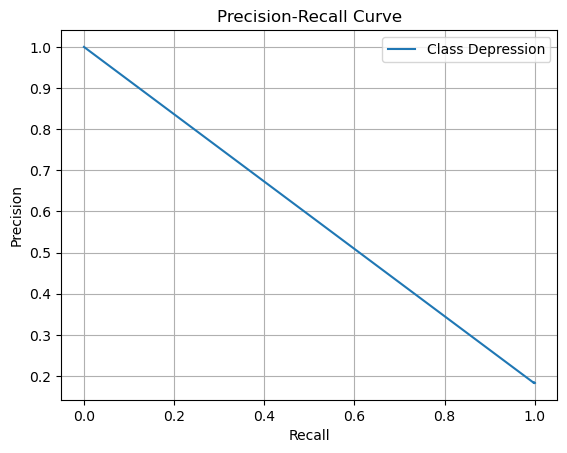

In [48]:
#高斯Naïve Bayes分類器

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


# 1. 數據準備

x = train_data.drop(columns=['id', 'Name','Depression'])
y = train_data['Depression']
test = test_data.drop(columns=['id', 'Name'])

'''
# 將 "Sleep Duration" 特徵轉換為數字
sleep_duration_col = 'Sleep Duration'

sleep_mapping = {
    'Less than 4 hours': 4,
    '4-6 hours': 5,
    '6-8 hours': 7,
    'More than 8 hours': 8
}

x[sleep_duration_col] = x[sleep_duration_col].map(sleep_mapping)
test[sleep_duration_col] = test[sleep_duration_col].map(sleep_mapping)

# 使用 SimpleImputer 填補缺失值 (這裡使用均值填補)
imputer = SimpleImputer(strategy='mean')

# 填補訓練集和測試集中的缺失值
x[sleep_duration_col] = imputer.fit_transform(x[[sleep_duration_col]])
test[sleep_duration_col] = imputer.transform(test[[sleep_duration_col]])

# 將數值進行離散化
kbin = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
x[sleep_duration_col] = kbin.fit_transform(x[[sleep_duration_col]])
test[sleep_duration_col] = kbin.transform(test[[sleep_duration_col]])
'''

# 80% 訓練，20% 測試
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#二元化
categorical_columns = x_train.select_dtypes(include=['object', 'category']).columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train[categorical_columns])
x_test_encoded = encoder.transform(x_test[categorical_columns])
test_encoded = encoder.transform(test[categorical_columns])


# 2.建立 DecisionTreeClassifier 模型
gnb = GaussianNB()  
bagging_model = BaggingClassifier(base_estimator=gnb, n_estimators=50, random_state=42)
bagging_model.fit(x_train_encoded, y_train)

# 3. 預測
y_pred = bagging_model.predict(x_test_encoded)

# 4. 效能評估
# 計算混淆矩陣
conf_matrix = confusion_matrix(y_test, y_pred)

# 生成分類報告
class_report = classification_report(y_test, y_pred)

# 計算準確率
accuracy = accuracy_score(y_test, y_pred)

# 輸出結果
print("混淆矩陣：")
print(conf_matrix)
print("\n準確率：", accuracy)
print("\n分類報告：")
print(class_report)


classes = y.unique()
y_test_bin = label_binarize(y_test, classes=[0, 1])  
y_score = bagging_model.predict_proba(x_test_encoded) 

# 繪製 Precision-Recall 曲線
precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), y_score[:, 1]) 
plt.plot(recall, precision, label='Class Depression')

# 曲線配置
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# 5. 對 test.csv 預測
test_predictions = bagging_model.predict(test_encoded)

# 6. 保存為 submission.csv
submission = pd.DataFrame({
    'id': test_data['id'],
    'Depression': test_predictions
})

submission.to_csv('submission_gnb.csv', index=False)

C:\Users\3253q\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
#決策樹分類器

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


# 1. 數據準備

x = train_data.drop(columns=['id', 'Name','Depression'])
y = train_data['Depression']
test = test_data.drop(columns=['id', 'Name'])

# 80% 訓練，20% 測試
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#二元化
categorical_columns = x_train.select_dtypes(include=['object', 'category']).columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train[categorical_columns])
x_test_encoded = encoder.transform(x_test[categorical_columns])
test_encoded = encoder.transform(test[categorical_columns])


# 2.建立 DecisionTreeClassifier 模型
dtc = DecisionTreeClassifier(random_state=42)  

# 定義參數網格
param_grid = {
    'criterion': ['gini', 'entropy'],  # 評估標準
    'max_depth': [3, 5, 7, 10],  # 樹的深度
    'min_samples_split': [2, 5, 10, 20],  # 分裂所需的最小樣本數
    'min_samples_leaf': [1, 2, 5, 10],  # 葉子節點所需的最小樣本數
    'max_features': ['auto', 'sqrt', None],  # 每個分裂點的特徵數量
}

# 使用 GridSearchCV 進行參數搜索
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# 訓練模型
grid_search.fit(x_train_encoded, y_train)

# 輸出最佳參數和最佳分數
print("最佳參數：", grid_search.best_params_)
print("最佳準確率：", grid_search.best_score_)

# 3. 預測
# 使用最佳模型進行預測
best_dtc = grid_search.best_estimator_
y_pred = best_dtc.predict(x_test_encoded)

# 4. 效能評估
# 計算混淆矩陣
conf_matrix = confusion_matrix(y_test, y_pred)

# 生成分類報告
class_report = classification_report(y_test, y_pred)

# 計算準確率
accuracy = accuracy_score(y_test, y_pred)

# 輸出結果
print("混淆矩陣：")
print(conf_matrix)
print("\n準確率：", accuracy)
print("\n分類報告：")
print(class_report)

C:\Users\3253q\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


最佳參數： {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
最佳準確率： 0.8979655294953803
混淆矩陣：
[[22024   962]
 [ 1920  3234]]

準確率： 0.8975835110163468

分類報告：
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     22986
           1       0.77      0.63      0.69      5154

    accuracy                           0.90     28140
   macro avg       0.85      0.79      0.82     28140
weighted avg       0.89      0.90      0.89     28140

